# ANALYSIS OF ALL USED DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Overview of the original dataset

In [2]:
plays = pd.read_csv("ir2017.csv")
plays.shape

(879298, 14)

In [3]:
plays.head(2)

,user,track,tempo,energy,echo_key,mode,liveness,speechiness,acousticness,danceability,duration,loudness,valence,instrumentalness
0,000c556aa021426138c47076d53dfbec,spotify:track:000UQuSa2QcsWFK0tGTBDM,97.522,0.734691,9,0,0.274507,0.062134,0.459002,0.704303,200.466,-6.841,0.527094,0.000008
1,000c556aa021426138c47076d53dfbec,spotify:track:001faoWrA2TK6dw9vHp9p6,109.692,0.180660,7,1,0.097553,0.055450,0.976753,0.527443,157.112,-11.901,0.540447,0.000226


### Statistics of all columns

In [4]:
plays.describe()

,tempo,energy,echo_key,mode,liveness,speechiness,acousticness,danceability,duration,loudness,valence,instrumentalness
count,879298.000000,879298.000000,879298.000000,879298.000000,879298.000000,879298.000000,8.792980e+05,879298.000000,879298.000000,879298.000000,879298.000000,8.792980e+05
mean,121.309874,0.618184,5.253699,0.663476,0.215647,0.075777,3.000766e-01,0.537233,250.758886,-9.174845,0.481483,1.884267e-01
std,28.630090,0.255861,3.569598,0.472521,0.198876,0.090974,3.357446e-01,0.175581,128.879642,5.105106,0.259408,3.197617e-01
min,30.168000,0.000020,0.000000,0.000000,0.005403,0.021297,9.034620e-07,0.031497,15.052300,-54.117000,0.000010,1.444210e-16
25%,99.879250,0.439610,2.000000,0.000000,0.096285,0.034318,1.383333e-02,0.417338,192.667000,-11.260000,0.268592,4.327960e-06
50%,120.219500,0.664855,5.000000,1.000000,0.130147,0.044569,1.354465e-01,0.546094,232.893000,-7.908000,0.475878,1.410150e-03
75%,138.179000,0.832315,9.000000,1.000000,0.271690,0.072126,5.664970e-01,0.665116,283.626000,-5.681000,0.691118,2.295080e-01
max,249.991000,0.999981,11.000000,1.000000,1.000000,0.968029,9.957960e-01,0.995121,5407.990000,4.708000,0.999990,9.991080e-01


### Histograms of all columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E0347B400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018E038A6668>]], dtype=object)

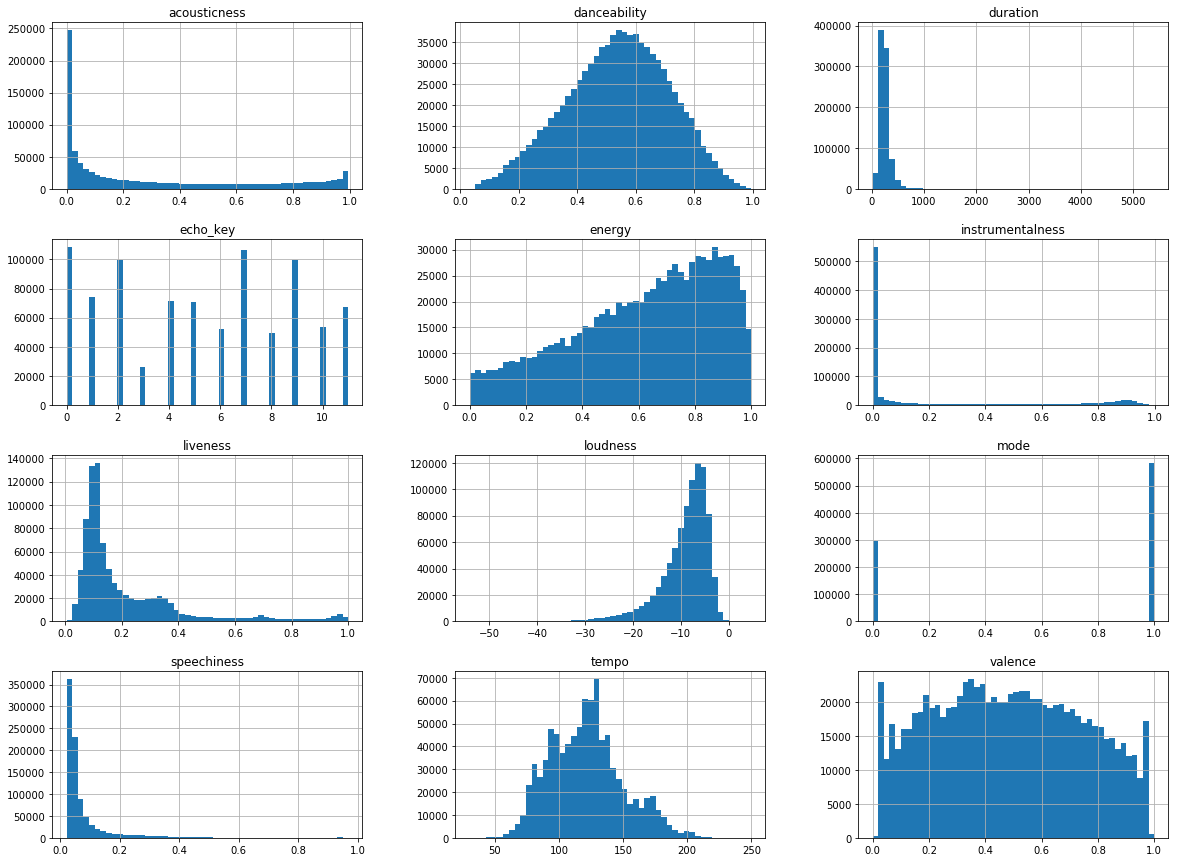

In [5]:
plays.hist(bins=50, figsize=(20,15))

### Unique users

In [6]:
len(plays['user'].unique())

569

### Unique tracks

In [7]:
len(plays['track'].unique())

566410

### Most active users (plays)

In [8]:
plays.groupby('user').size().sort_values(ascending=False).head(10)

user
92b24592aac4970c78f8d0b488c562ac    45210
afd66300ce8131c7cd9e982c76c81664    28171
c8d54d18ef2370dc24dfccd0405a542a    27347
021e2208f95d2d9fa6dd303313040516    24730
66247e739fa65b71d8b5a4aab58f9702    20843
26edd38b34f2799c8575ecf9dfa53258    14194
14f94090c910355ba42bc974fc206c04    13665
d5a2ba172aed2608f3fe712f5a142b38    11465
39547a7106a0373877a0c0327a384c31     9863
4def6bd17d0766d9cce1162304a64742     9632
dtype: int64

### Aggregated play count per user

In [9]:
plays.groupby('user').size().describe()
# note: 50% percentile is the median

count      569.000000
mean      1545.339192
std       3203.783778
min          4.000000
25%        390.000000
50%        784.000000
75%       1471.000000
max      45210.000000
dtype: float64

### Aggregated play count per track

In [10]:
plays.groupby('track').size().describe()
# note: 50% percentile is the median

count    566410.000000
mean          1.552406
std           1.776439
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          87.000000
dtype: float64

### Does the dataset contain duplicates for (user, track) combinations, eg. a user playing a track multiple times?

In [22]:
(plays.groupby(['user', 'track']).size() > 1).reset_index().drop(['user','track'], axis=1).groupby(0).size()
# result: no

0
False    879298
dtype: int64

# Overview of the dataset with track and artist names

In [12]:
tracks_with_names = pd.read_csv("tracks_with_metadata.csv", index_col=0)
tracks_with_names.head(2)

,tempo,energy,echo_key,mode,liveness,speechiness,acousticness,danceability,duration,loudness,valence,instrumentalness,name,artist,album,album_type,album_track_number,explicit_content,popularity
track,,,,,,,,,,,,,,,,,,,
spotify:track:000UQuSa2QcsWFK0tGTBDM,97.522,0.734691,9,0,0.274507,0.062134,0.459002,0.704303,200.466,-6.841,0.527094,0.000008,La Primavera,Estopa,La Primavera,single,1,False,29
spotify:track:001faoWrA2TK6dw9vHp9p6,109.692,0.180660,7,1,0.097553,0.055450,0.976753,0.527443,157.112,-11.901,0.540447,0.000226,"Early In the Morning, I'll Come Calling",James Vincent McMorrow,Early In the Morning,album,11,False,0


### Unique artists

In [13]:
len(tracks_with_names['artist'].unique())

54471

### Tracks per artist

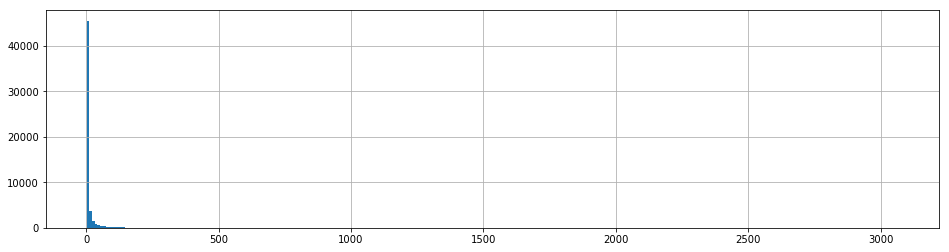

In [15]:
tracks_with_names.groupby('artist').size().hist(bins=300, figsize=(16,4))

### Most played tracks

In [16]:
plays_per_track = plays.groupby('track').size().to_frame('size')
plays_per_track.head(2)

,size
track,
spotify:track:0001Lyv0YTjkZSqzT4WkLy,1
spotify:track:0006UDPJnXbuEaYWVVECnj,1


In [17]:
# join with tracks_with_names to include artist and track names
plays_per_track.join(tracks_with_names[['artist', 'name']]).sort_values(by='size', ascending=False).head(10)

,size,artist,name
track,,,
spotify:track:2Foc5Q5nqNiosCNqttzHof,87,Daft Punk,Get Lucky - Radio Edit
spotify:track:1jJci4qxiYcOHhQR247rEU,81,MGMT,Kids
spotify:track:3bidbhpOYeV4knp8AIu8Xn,69,Macklemore & Ryan Lewis,Can't Hold Us - feat. Ray Dalton
spotify:track:4VqPOruhp5EdPBeR92t6lQ,69,Muse,Uprising
spotify:track:69kOkLUCkxIZYexIgSG8rq,69,Daft Punk,Get Lucky
spotify:track:6NPVjNh8Jhru9xOmyQigds,66,Pharrell Williams,Happy
spotify:track:3dOAXUx7I1qnzWzxdnsyB8,66,The Black Keys,Lonely Boy
spotify:track:75JFxkI2RXiU7L9VXzMkle,65,Coldplay,The Scientist
spotify:track:7w87IxuO7BDcJ3YUqCyMTT,64,Foster The People,Pumped Up Kicks


### Most played artists

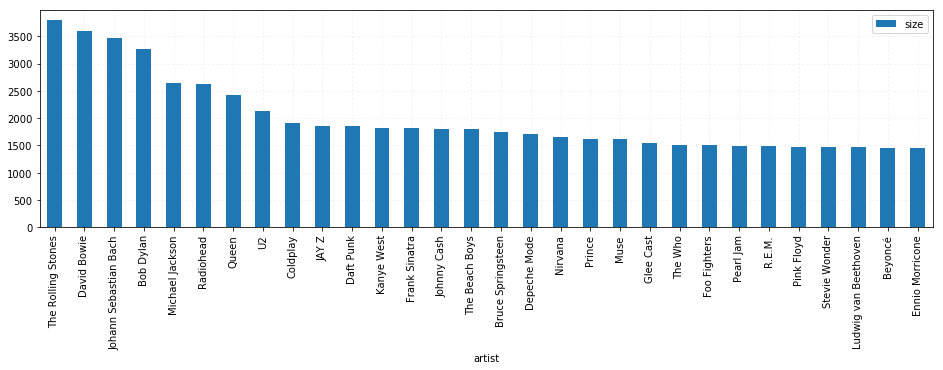

In [18]:
plays_with_names = plays.set_index('track').join(tracks_with_names[['artist', 'name', 'album', 'popularity']])
most_played_artists = plays_with_names.groupby('artist').size().to_frame('size')

most_played_artists.sort_values(by='size', ascending=False).head(30).plot(kind='bar', figsize=(16,4), zorder=2)
plt.grid(color='#eeeeee', linestyle=':')

### Most played albums

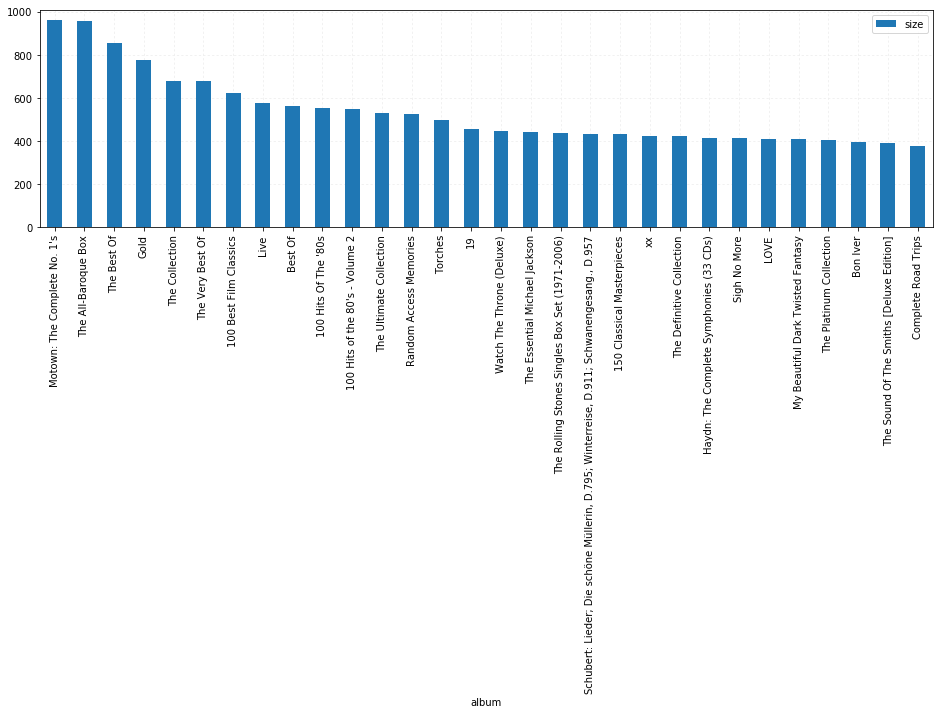

In [19]:
most_played_albums = plays_with_names.groupby('album').size().to_frame('size')
# slicing with [1:] because first album is "Greatest Hits" (probably exists for many artists)
most_played_albums.sort_values(by='size', ascending=False)[1:].head(30).plot(kind='bar', figsize=(16,4), zorder=2)
plt.grid(color='#eeeeee', linestyle=':')

### Most played "popularity"
popularity is a field that the Spotify API offers for every track (type: integer)

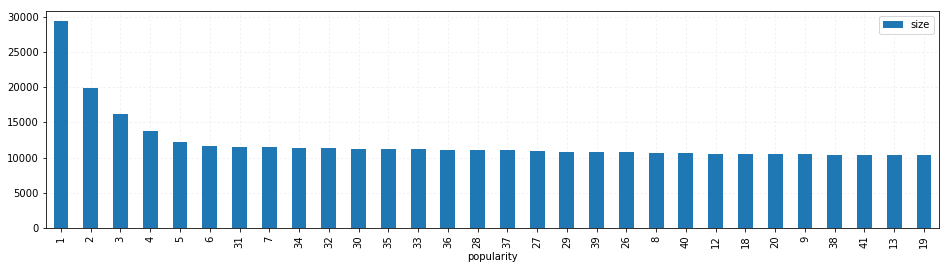

In [20]:
most_played_popularity = plays_with_names.groupby('popularity').size().to_frame('size')
most_played_popularity.sort_values(by='size', ascending=False)[1:].head(30).plot(kind='bar', figsize=(16,4), zorder=2)
plt.grid(color='#eeeeee', linestyle=':')